# Prepare data

Prepare time-series data. This includes handling missing entries and possibly resampling datapoints.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

from IPython.display import display_html
def display_side_by_side(*args):
    """
    Taken from https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
    """
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

## Get raw data

In [2]:
df1 = pd.read_csv("../data/kaer_insead_at_8May18-21786.csv.gz",
                  index_col="Time Stamp",
                  parse_dates=True,
                  compression="gzip"
                 )

df2 = pd.read_csv("../data/kaer_insead_at_8May18-27169.csv.gz",
                  index_col="Time Stamp",
                  parse_dates=True,
                  compression="gzip"
                 )

df1.index.name = "timestamp"
df2.index.name = "timestamp"

display_side_by_side(df1.head(), df2.head())

/home/hongwei/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chwshdr,cwrhdr,cwshdr,cwsfhdr,ch1kw,ch2kw,ch3kw,loadsys,chwsfhdr
timestamp,,,,,,,,,
2016-02-01 00:00:00,0.00000,30.4664,0,0,0,0,0,0,0
2016-02-01 00:01:00,8.46289,30.3218,27.143,536.522,0.844,0.856,82.944,113.924,407.278
2016-02-01 00:02:00,8.50649,30.2704,27.1343,531.157,0.848,0.88,81.92,111.232,402.875
2016-02-01 00:03:00,8.52001,30.2337,27.1465,532.766,0.864,0.868,80.896,108.164,395.83
2016-02-01 00:04:00,8.48630,30.2245,27.151,534.376,0.872,0.88,79.872,105.685,385.703
,chwshdr,cwrhdr,cwshdr,cwsfhdr,ch1kw,ch2kw,ch3kw,loadsys,chwsfhdr
timestamp,,,,,,,,,
2018-04-01 00:00:00,0.0000,0.0000,0.0000,576.223,42.24,0.848,0,95.6832,486.972
2018-04-01 00:01:00,10.7674,28.8237,26.3996,579.979,42.24,0.852,0,96.2943,486.091


## Mark missing data

In [3]:
df1 = df1.replace("\\N", np.nan)
df2 = df2.replace("\\N", np.nan)

## Analyze missing values

In [4]:
# Group data by day of month and count number of entries that are null
# Display only days with missing entries
missing1 = df1.isnull().groupby(df1.index.to_period("D")).sum()
missing1.loc[np.any(missing1 > 0, axis=1)]

,chwshdr,cwrhdr,cwshdr,cwsfhdr,ch1kw,ch2kw,ch3kw,loadsys,chwsfhdr
timestamp,,,,,,,,,
2016-02-23,0.0,767.0,755.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-24,0.0,1412.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0
2016-02-25,0.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,8.0
2016-02-26,0.0,1383.0,1383.0,6.0,1.0,1.0,1.0,1.0,6.0


In [5]:
# Group data by day of month and count number of entries that are null
# Display only days with missing entries
missing2 = df2.isnull().groupby(df2.index.to_period("D")).sum()
missing2.loc[np.any(missing2 > 0, axis=1)]

,chwshdr,cwrhdr,cwshdr,cwsfhdr,ch1kw,ch2kw,ch3kw,loadsys,chwsfhdr
timestamp,,,,,,,,,
2018-04-05,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-06,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
2018-04-08,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-13,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-15,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-25,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-28,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-30,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
df1_null = df1.isnull().sum().to_frame("Number of '\\N' entries")
df2_null = df2.isnull().sum().to_frame("Number of '\\N' entries")
display_side_by_side(df1_null, df2_null)

,Number of '\N' entries
chwshdr,0
cwrhdr,3570
cwshdr,2151
cwsfhdr,19
ch1kw,1
ch2kw,1
ch3kw,1
loadsys,1
chwsfhdr,19
,Number of '\N' entries


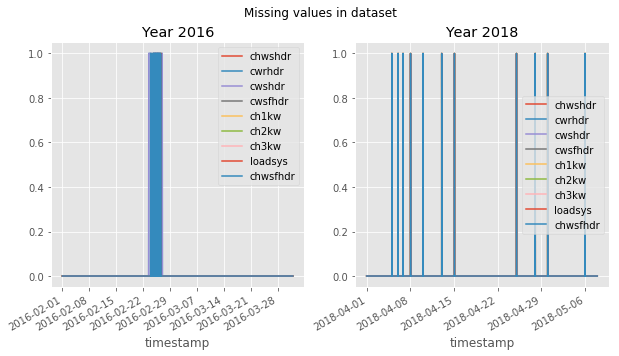

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

(df1.isnull().astype(int)).plot(ax=axes[0])
(df2.isnull().astype(int)).plot(ax=axes[1])

fig.suptitle("Missing values in dataset")
axes[0].set_title("Year 2016")
axes[1].set_title("Year 2018");

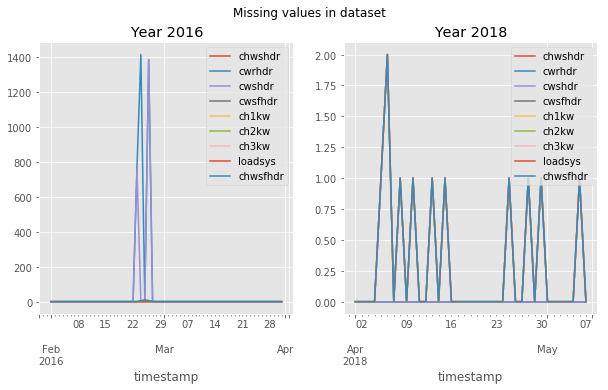

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

(df1.isnull().astype(int)).groupby(df1.index.to_period("D")).sum().plot(ax=axes[0])
(df2.isnull().astype(int)).groupby(df2.index.to_period("D")).sum().plot(ax=axes[1])

fig.suptitle("Missing values in dataset")
axes[0].set_title("Year 2016")
axes[1].set_title("Year 2018");

## Drop null values

In [9]:
df1.shape, df2.shape

((85193, 9), (53158, 9))

In [10]:
df1 = df1.dropna()
df2 = df2.dropna()

In [11]:
df1.shape, df2.shape

((81623, 9), (53147, 9))

In [13]:
assert( not (np.any(df1.isnull()) or np.any(df2.isnull())))

## Convert data type to float

In [14]:
def fix_dtypes(df, columns):
    for c in columns:
        if df.dtypes[c] != np.float64:
            df[c] = pd.to_numeric(df[c], errors="raise")
    return df

In [15]:
col_names = ['chwshdr', 'cwrhdr', 'cwshdr', 'cwsfhdr', 
             'ch1kw', 'ch2kw', 'ch3kw','loadsys', 'chwsfhdr']

df1 = fix_dtypes(df1, col_names)
df2 = fix_dtypes(df2, col_names)
df1.dtypes, df2.dtypes

(chwshdr     float64
 cwrhdr      float64
 cwshdr      float64
 cwsfhdr     float64
 ch1kw       float64
 ch2kw       float64
 ch3kw       float64
 loadsys     float64
 chwsfhdr    float64
 dtype: object, chwshdr     float64
 cwrhdr      float64
 cwshdr      float64
 cwsfhdr     float64
 ch1kw       float64
 ch2kw       float64
 ch3kw         int64
 loadsys     float64
 chwsfhdr    float64
 dtype: object)

## Resample time-series

Resample time-series so that time spacing is even.

In [13]:
df1_sampled = df1.groupby(pd.Grouper(freq='D')).resample("5min", closed="left", label="right").mean()
df1_sampled.reset_index(level=0, inplace=True)
df2_sampled = df2.groupby(pd.Grouper(freq='D')).resample("5min", closed="left", label="right").mean()
df2_sampled.reset_index(level=0, inplace=True)
display_side_by_side(df1_sampled.head(3), df2_sampled.head(3))

,timestamp,chwshdr,cwrhdr,cwshdr,cwsfhdr,ch1kw,ch2kw,ch3kw,loadsys,chwsfhdr
timestamp,,,,,,,,,,
2016-02-01 00:05:00,2016-02-01,6.795138,30.30336,21.71496,426.9642,0.6856,0.6968,65.1264,87.80100,318.3372
2016-02-01 00:10:00,2016-02-01,8.469926,30.04602,27.10646,524.1820,0.8672,0.8720,75.5712,101.22132,371.9654
2016-02-01 00:15:00,2016-02-01,8.450484,29.83354,27.04058,512.3792,0.8720,0.8688,69.5296,89.08462,354.9698
,timestamp,chwshdr,cwrhdr,cwshdr,cwsfhdr,ch1kw,ch2kw,ch3kw,loadsys,chwsfhdr
timestamp,,,,,,,,,,
2018-04-01 00:05:00,2018-04-01,8.61446,23.05286,21.11866,580.4080,42.2400,0.8504,0.0,95.41384,485.4748
2018-04-01 00:10:00,2018-04-01,10.71612,28.72886,26.38856,578.7986,41.1136,0.8472,0.0,89.89642,483.0092
2018-04-01 00:15:00,2018-04-01,10.70414,28.54420,26.33778,579.4422,39.8848,0.8488,0.0,86.63760,478.6938


## Create binary on/off state of chillers

This is based on comments by Dr Chai given in his email.

In [16]:
def assign_chiller_state(df, threshold):
    df = df.assign(ch1_status=(df.ch1kw >= threshold).astype(np.int))
    df = df.assign(ch2_status=(df.ch2kw >= threshold).astype(np.int))
    df = df.assign(ch3_status=(df.ch3kw >= threshold).astype(np.int))
    return df

In [18]:
threshold = 10
df1 = assign_chiller_state(df1, threshold)
df2 = assign_chiller_state(df2, threshold)

## Create target value

$$\text{totalkw} = \sum_{i = 1}^3 \text{ch<i>kw}$$

In [20]:
outputs = ["ch1kw", "ch2kw", "ch3kw"]
df1 = df1.assign(totalkw=df1.loc[:, outputs].sum(axis=1))
df2 = df2.assign(totalkw=df2.loc[:, outputs].sum(axis=1))

## Visualize difference between original and re-sampled

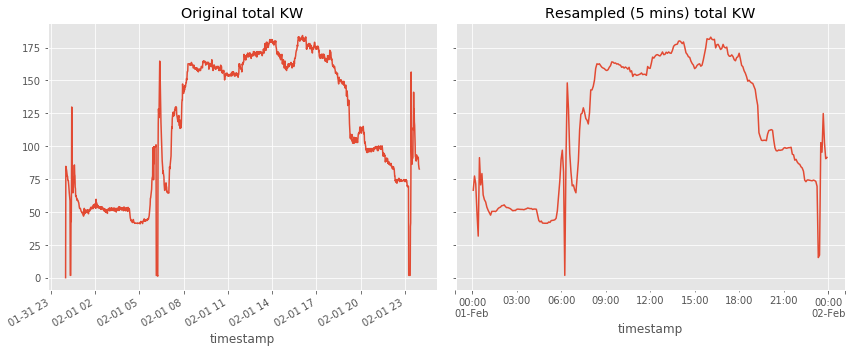

In [17]:
# Visualize one example
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

df1.loc["2016-02-01", outputs].sum(axis=1).plot(ax=axes[0], title="Original total KW")
df1_sampled.loc["2016-02-01"].totalkw.plot(ax=axes[1], title="Resampled (5 mins) total KW")

fig.tight_layout()

## Save processed data

In [21]:
df1.to_csv("../data/insead_2016_no_missing.csv.gz", compression="gzip")
df2.to_csv("../data/insead_2018_no_missing.csv.gz", compression="gzip")

---

## Save resampled data

In [18]:
df1_raw = df1
df2_raw = df2

df1 = df1_sampled
df2 = df2_sampled

df1_raw.to_csv("../data/insead_2016.csv.gz", compression="gzip")
df2_raw.to_csv("../data/insead_2018.csv.gz", compression="gzip")

df1.to_csv("../data/insead_2016_resampled.csv.gz", compression="gzip")
df2.to_csv("../data/insead_2018_resampled.csv.gz", compression="gzip")

## Read processed data

In [19]:
df1_raw = pd.read_csv("../data/insead_2016.csv.gz", index_col="timestamp", 
                      parse_dates=["timestamp"], compression="gzip")
df2_raw = pd.read_csv("../data/insead_2018.csv.gz", index_col="timestamp", 
                      parse_dates=["timestamp"], compression="gzip")

df1 = pd.read_csv("../data/insead_2016_resampled.csv.gz", index_col="timestamp", 
                  parse_dates=["timestamp"], compression="gzip")
df2 = pd.read_csv("../data/insead_2018_resampled.csv.gz", index_col="timestamp", 
                  parse_dates=["timestamp"], compression="gzip")

## Final set of attributes

In [22]:
pd.DataFrame(df1.columns, columns=["Attribute"])

,Attribute
0,chwshdr
1,cwrhdr
2,cwshdr
3,cwsfhdr
4,ch1kw
5,ch2kw
6,ch3kw
7,loadsys
8,chwsfhdr
9,ch1_status


## Features and target

In [21]:
features = [
"chwshdr",
"cwrhdr",
"cwshdr",
"cwsfhdr",
"loadsys",
"chwsfhdr", 

"ch1_status",
"ch2_status",
"ch3_status",
]

status_features = [
"ch1_status",
"ch2_status",
"ch3_status"    
]

target = ["totalkw",
          # "ch1kw",
          # "ch2kw",
          # "ch3kw",    
         ]